In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
plt.plot([1,2,3,5,7,8], color='red')
plt.ylabel('numbers')
plt.xlabel('x')
plt.show()

In [ ]:
alphabet = ['a','b','c']
values = [1,50,100]

plt.figure(figsize=(12,4))

plt.subplot(131)
plt.bar(alphabet, values)
plt.subplot(1,3,2)
plt.scatter(alphabet, values)
plt.subplot(133)
plt.plot(alphabet,values)
plt.suptitle('Categorical Plotting')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/9일차/BIPA_data.csv", index_col = 0)

In [ ]:
data1_10 = data[data['championId'].isin(range(0,11))]
group1_10 = data1_10.groupby("championId", as_index = False).mean()

In [ ]:
# figure = 캔버스, ax = 그림의 여러 부분
fig, ax = plt.subplots(figsize = (7, 4))
ax.barh(group1_10['championId'], group1_10['totalDamageDealtToChampions'])

In [ ]:
#championIndex Load

import requests
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/'+champ_ver+'/data/en_US/champion.json'
request = requests.get(championJsonURL)
champion_data=request.json()
champion_data.keys()
champion_dict = {}
for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
champion_dict.keys()
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [ ]:
champion

In [ ]:
#champion, data merge /
group1_10 = pd.merge(group1_10, champion, left_on = 'championId', right_index = True)

In [ ]:
# y axis
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])

In [ ]:
# DF 바로 그리기
group1_10['totalDamageDealtToChampions'].plot(kind = 'barh')

In [ ]:
# change Index
group1_10.index = group1_10.champion
group1_10['totalDamageDealtToChampions'].plot(kind = 'barh')

In [ ]:
# change color
sns.set_palette('bright')
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'])

In [ ]:
# change color_2: one
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(group1_10['champion'], group1_10['totalDamageDealtToChampions'], color = '#000000')

In [ ]:
# seaborn
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x='totalDamageDealtToChampions', y='champion')

In [ ]:
# xlabel, ylabel, title
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x='totalDamageDealtToChampions', y='champion')
ax.set_xlabel('Avg_damage')
ax.set_ylabel('Champion Name')
ax.set_title('Avg Champion Damage')

In [ ]:
# change font
font_label = {
    'color' : 'blue',
    'weight': 'bold'
}

font_title = {
    'family' : 'brown',
    'size': 20,
    #'background':'black',
    'color':'brown',
    'weight':'bold',
    'verticalalignment':'baseline',
    'horizontalalignment':'center'
}

fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x='totalDamageDealtToChampions', y='champion')
ax.set_xlabel('Avg_damage', fontdict = font_label, labelpad=20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad=12)

In [ ]:
# set limit line
# change font
font_label = {
    'color' : 'blue',
    'weight': 'bold'
}

font_title = {
    'family' : 'brown',
    'size': 20,
    #'background':'black',
    'color':'brown',
    'weight':'bold',
    'verticalalignment':'baseline',
    'horizontalalignment':'center'
}

fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x='totalDamageDealtToChampions', y='champion')

###
ax.set_xlim(10000,20000)

### labelpad = distance between label and graph
ax.set_xlabel('Avg_damage', fontdict = font_label, labelpad=20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=20)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad=12)

#Error
#1)AttributeError: ->pick error, check last

In [ ]:
# Set limit line last
# change font
font_label = {
    'color' : 'blue',
    'weight': 'bold'
}

font_title = {
    'family' : 'brown',
    'size': 20,
    #'background':'black',
    'color':'brown',
    'weight':'bold',
    'verticalalignment':'baseline',
    'horizontalalignment':'center'
}

fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = group1_10, x='totalDamageDealtToChampions', y='champion')
ax.set_xlim(10000,20000)
###
damage_mean = group1_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls = '-.', lw = 3, color = 'green')
arrowprops = {
    'arrowstyle' :  '->'
}
ax.annotate("average", (damage_mean, 2.5),
              xytext = (17000, 2.5), color='green',
            fontfamily = 'serif', fontstyle= 'italic',
            fontsize = 20, arrowprops = arrowprops)
###
ax.set_xlabel('Avg_damage', fontdict = font_label, labelpad=20)
ax.set_ylabel('Champion Name', color = 'blue', labelpad=20)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad=12)


In [ ]:
group_data = data[data['gameLength']>1200].groupby(
    ['position', 'championId'], as_index = False).mean()
group_data

In [ ]:
sns.boxplot(y=data['totalDamageDealtToChampions'], x=data['position'])

In [ ]:
sns.violinplot(y=data['totalDamageDealtToChampions'], x=data['position'])

In [ ]:
sns.displot(data[data['totalDamageDealtToChampions']<60000]
            ['totalDamageDealtToChampions'])

In [ ]:
# position 따라 Dealt차이
sns.displot(group_data, x='totalDamageDealtToChampions', hue = 'position')

In [ ]:
sns.displot(group_data, x='totalDamageDealtToChampions', height=4, aspect=2)

In [ ]:
# ADC랑 SUP 딜량 비교 - 'dodge'->옆에다 붙이겟다
sns.displot(group_data[group_data['position'].isin(['A','S'])],
            x='totalDamageDealtToChampions',
            hue='position',multiple='dodge', 
            height=4, aspect=2)

In [ ]:
champ_stats = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/9일차/champ_stats.csv")

In [ ]:
champ_stats

In [ ]:
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')
#.set_xlim(450,650)

In [ ]:
# scatter plot 모든 챔피언 이름
sns.scatterplot(data=champ_stats, x='hp', y='hp_18')
plt.text(x= champ_stats[champ_stats['championName']=='Kled']['hp']+7,
         y = champ_stats[champ_stats['championName'] == 'Kled']['hp_18']+7,
         s = 'Kled')

In [ ]:
plt.figure(figsize = (14,14))
sns.scatterplot(data=champ_stats, x='hp', y='hp_18').set_xlim(450,650)
for ch in champ_stats['championName']:
  if(ch == 'Kled'):
    continue
  plt.text(x = champ_stats[champ_stats['championName'] == ch]['hp']+1,
           y = champ_stats[champ_stats['championName'] == ch]['hp_18']+1,
           s=ch)

**[과제] 와드 개수 별 승률**

In [ ]:
ward_data = data.copy()
ward_data = ward_data.replace({'WIN':1, 'LOSE':0})
ward_data['len'] = 1
ward_data.drop(ward_data[ward_data['result']=='UNKNOWN'].index, inplace=True)

In [ ]:
ward_data = ward_data[['wardPlaced','result','len']]
ward_data = ward_data[ward_data['wardPlaced'] < 40]
ward_data = ward_data.sort_values(by='wardPlaced')
ward_data

In [ ]:
ward1 = ward_data.groupby(['wardPlaced'],as_index=False)['len'].sum()

In [ ]:
ward_data['result'] = pd.to_numeric(ward_data['result'])

In [ ]:
ward2 = ward_data.groupby(['wardPlaced'], as_index=False)['result'].sum()

In [ ]:
ward3 = pd.merge(ward1, ward2, on=['wardPlaced'])
ward3['winrate'] = ward3['result']/ward3['len']
ward3

Text(0, 0.5, 'winrate')

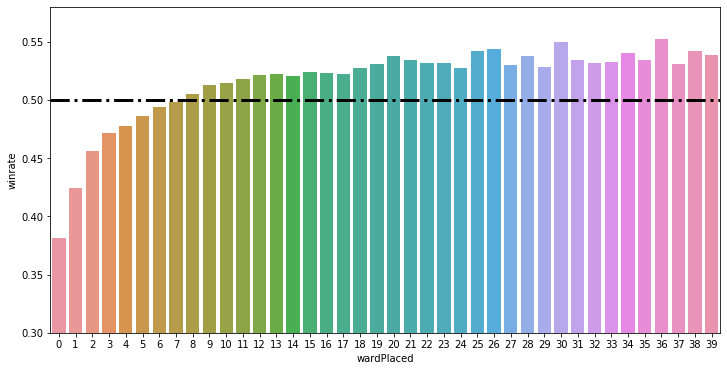

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = ward3, x='wardPlaced',
                          y = 'winrate').set_ylim(0.3, 0.58)
ax.axhline(0.5, ls = '-.', lw=3, color='black')

ax.set_xlabel('wardPlaced')
ax.set_ylabel('winrate')